/home/mitch/PythonProjects/tdsf/results/noise_study_ood_domain_no_phy_smaller/0.0
(795300, 1) (795300, 1) (795300, 3)
(130600, 1) (130600, 1) (130600, 3)
(32700, 1) (32700, 1) (32700, 3)


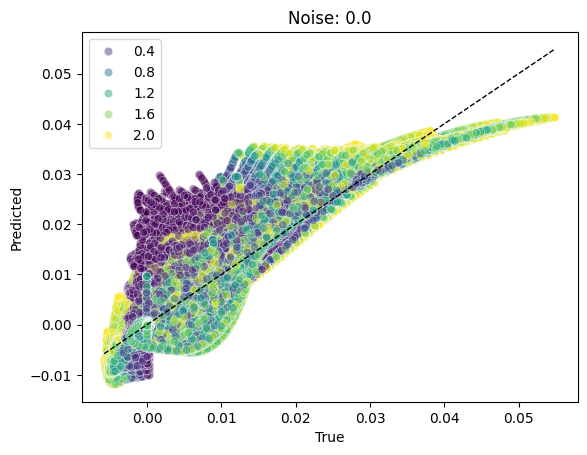

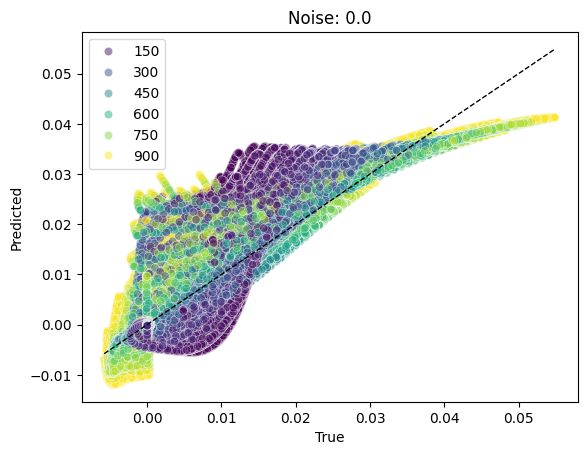

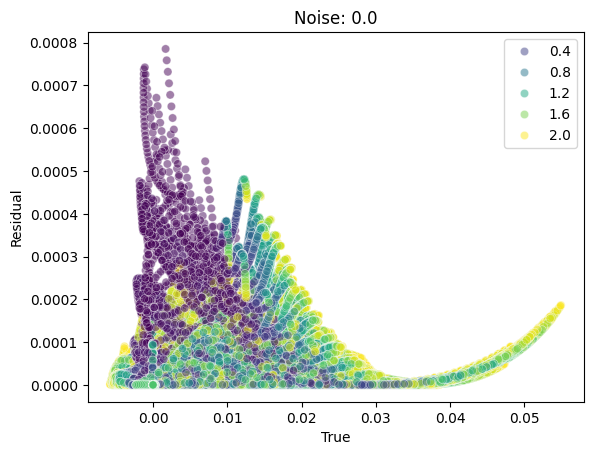

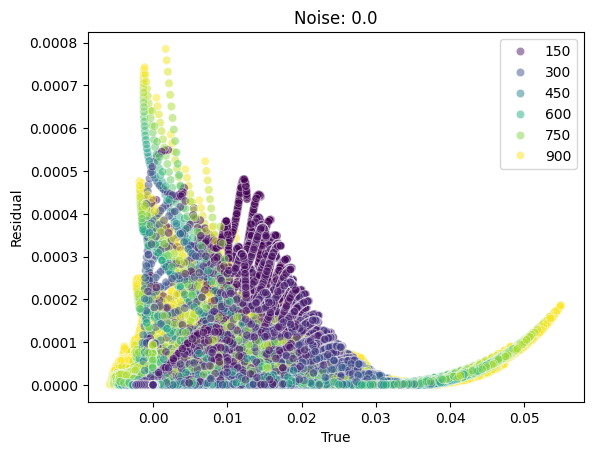

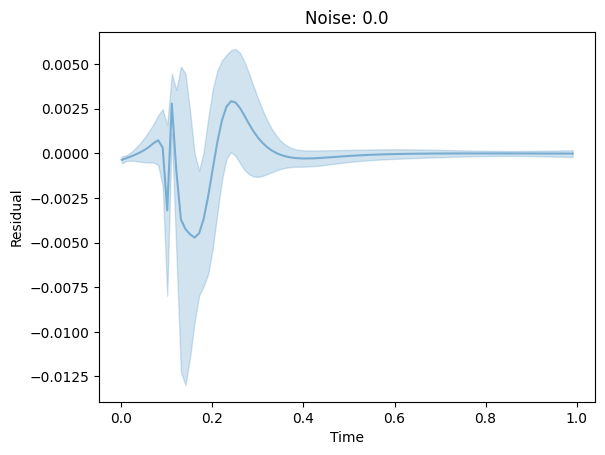

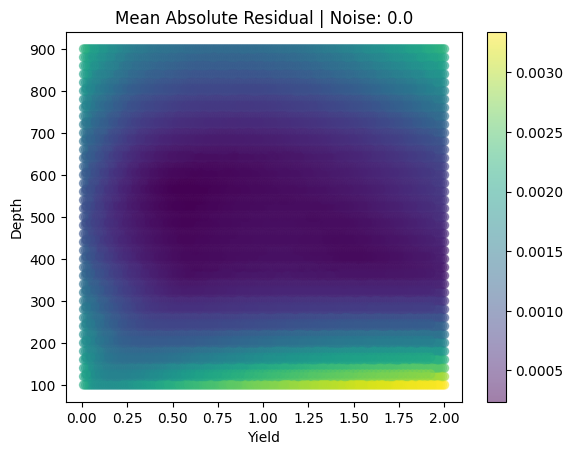

/home/mitch/PythonProjects/tdsf/results/noise_study_ood_domain_no_phy_smaller/0.2
(795300, 1) (795300, 1) (795300, 3)
(130600, 1) (130600, 1) (130600, 3)
(32700, 1) (32700, 1) (32700, 3)


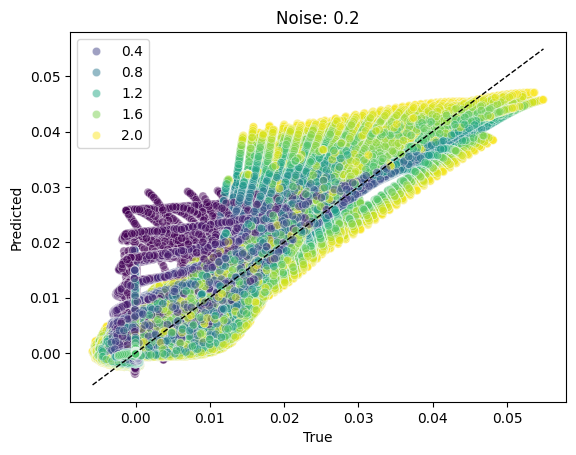

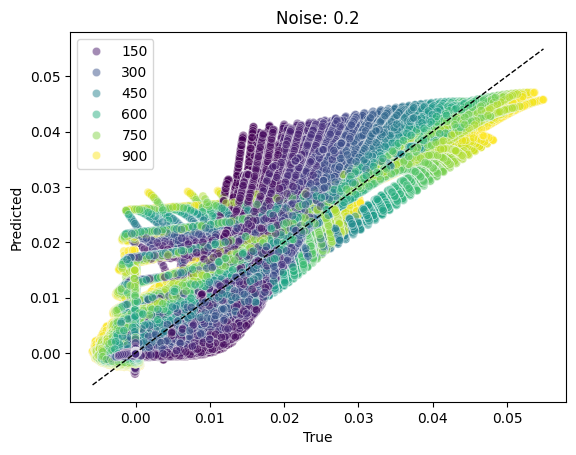

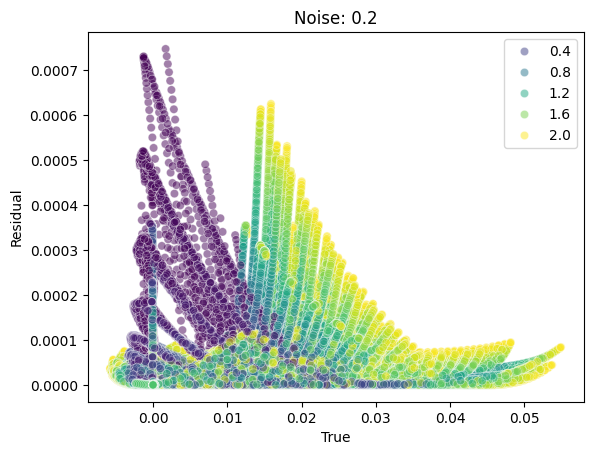

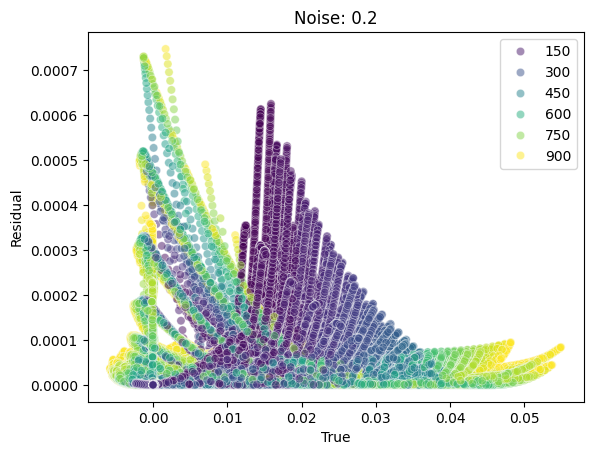

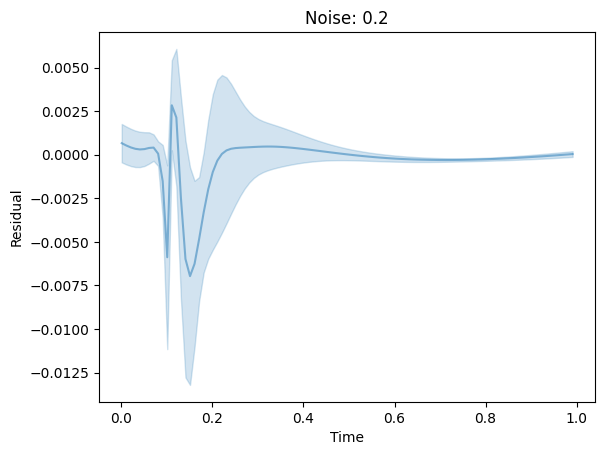

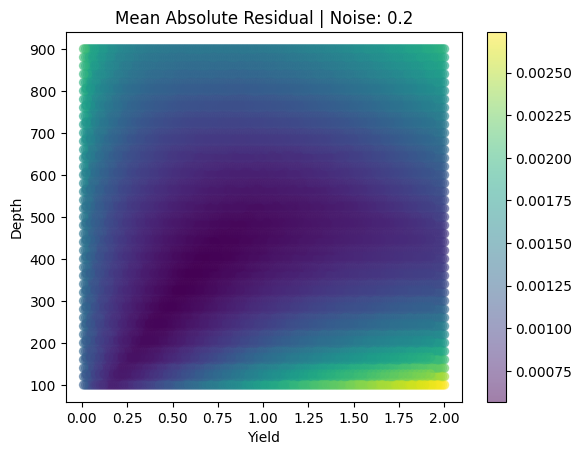

/home/mitch/PythonProjects/tdsf/results/noise_study_ood_domain_no_phy_smaller/0.5
(795300, 1) (795300, 1) (795300, 3)
(130600, 1) (130600, 1) (130600, 3)
(32700, 1) (32700, 1) (32700, 3)


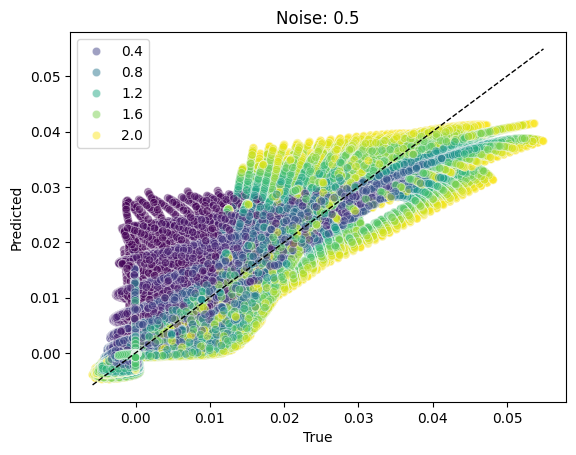

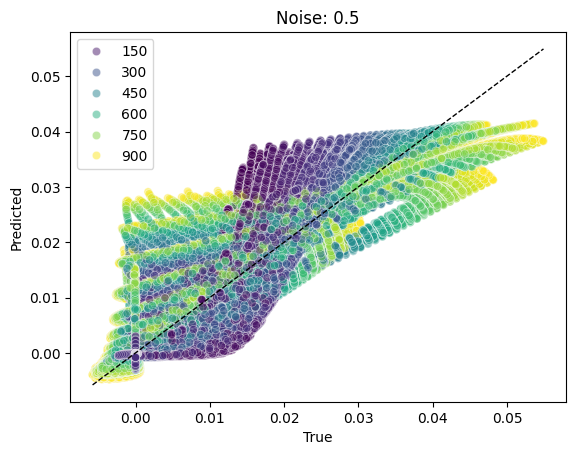

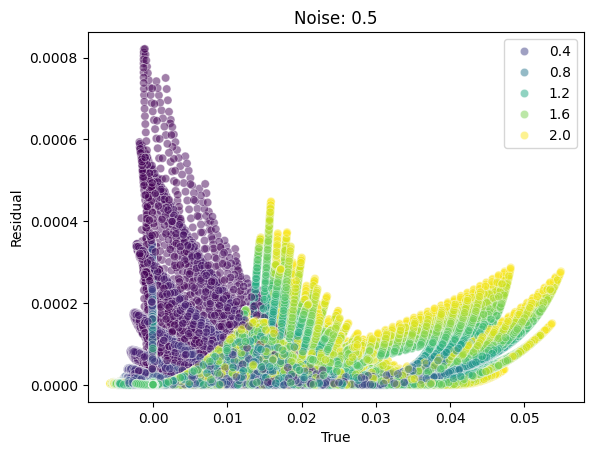

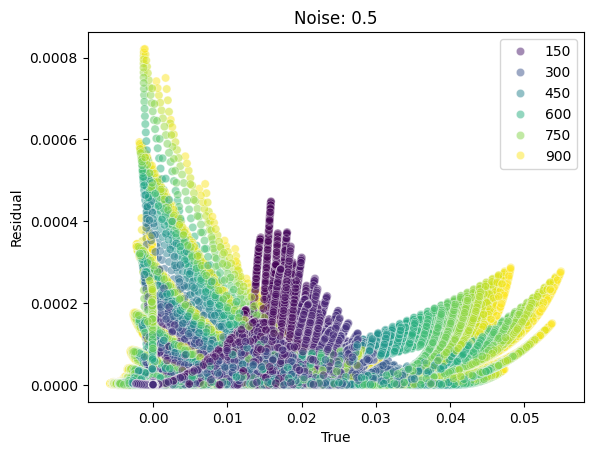

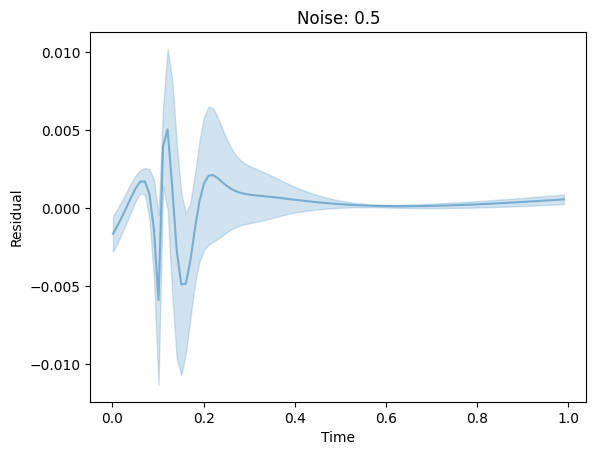

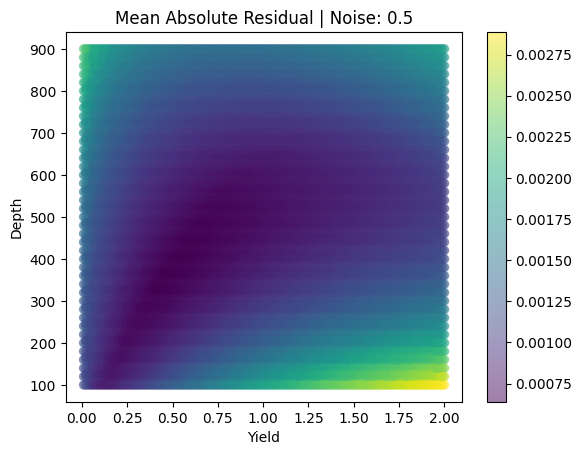

In [132]:
import os 
root = os.path.abspath('')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import scipy.io as sio

# 'noise_study_ood'
# noise_study_ood_phy_domain_sampled
studies = ['noise_study_ood_domain_no_phy_smaller']
sigmas = [0.00, 0.2, 0.5] #, 0.01, 0.1, 0.2, 0.5

for study in studies:
    for sigma in sigmas:
        d = f'{root}/results/{study}/{sigma}'
        print(d)
        mat = sio.loadmat(f'{d}/SeismicWave_TDSF_forward_PGNN_v1_result.mat')
        Ymax, Ymin, Xmax, Xmin = mat['Ymax'], mat['Ymin'], mat['Xmax'], mat['Xmin']
        
        Yhat_test, Ytest, Xtest  = mat['Yhat_test'], mat['Ytest'], mat['Xtest']
        Yhat_train, Ytrain, Xtrain = mat['Yhat_train'], mat['Ytrain'], mat['Xtrain']
        Yhat_val, Yval, Xval = mat['Yhat_val'], mat['Yval'], mat['Xval']
        
        print(Yhat_test.shape, Ytest.shape, Xtest.shape)
        print(Yhat_train.shape, Ytrain.shape, Xtrain.shape)
        print(Yhat_val.shape, Yval.shape, Xval.shape)
        
        Ymax, Ymin, Xmax, Xmin = Ymax[0,0], Ymin[0,0], Xmax[0,0], Xmin[0,0]
        
        # make a seaborn scatterplot with a continuous color mapping
        ax = sns.scatterplot(x=Ytest[:,0], y=Yhat_test[:,0], hue=Xtest[:,0], palette='viridis', alpha=0.5)
        plt.plot([Ymin, Ymax], [Ymin, Ymax], color='black', lw=1, linestyle='--')
        plt.xlabel('True')
        plt.ylabel('Predicted')
        plt.title(f'Noise: {sigma}')
        plt.savefig(f'{root}/results/{study}/{sigma}/disp_true_v_pred_test_yield.png')
        plt.show()

        ax = sns.scatterplot(x=Ytest[:,0], y=Yhat_test[:,0], hue=Xtest[:,1], palette='viridis', alpha=0.5)
        plt.plot([Ymin, Ymax], [Ymin, Ymax], color='black', lw=1, linestyle='--')
        plt.xlabel('True')
        plt.ylabel('Predicted')
        plt.title(f'Noise: {sigma}')
        plt.savefig(f'{root}/results/{study}/{sigma}/disp_true_v_pred_test_depth.png')
        plt.show()

        residuals = (Yhat_test - Ytest)**2
        ax = sns.scatterplot(x=Ytest[:,0], y=residuals[:,0], hue=Xtest[:,0], palette='viridis', alpha=0.5)
        plt.xlabel('True')
        plt.ylabel('Residual')
        plt.title(f'Noise: {sigma}')
        plt.savefig(f'{root}/results/{study}/{sigma}/disp_resid_test_yield.png')
        plt.show()

        ax = sns.scatterplot(x=Ytest[:,0], y=residuals[:,0], hue=Xtest[:,1], palette='viridis', alpha=0.5)
        plt.xlabel('True')
        plt.ylabel('Residual')
        plt.title(f'Noise: {sigma}')
        plt.savefig(f'{root}/results/{study}/{sigma}/disp_resid_test_depth.png')
        plt.show()

        n_t = 100
        n_test = int(Ytest.shape[0]//n_t)
        t = Xtest[:,-1].reshape(n_test, n_t)
        residuals = Ytest.reshape(n_test, n_t) - Yhat_test.reshape(n_test, n_t)

        ax = sns.lineplot(x=t.reshape(-1,1)[:,0], y=residuals.reshape(-1,1)[:,0], alpha=0.5, errorbar='sd')
        plt.xlabel('Time')
        plt.ylabel('Residual')
        plt.title(f'Noise: {sigma}')
        plt.savefig(f'{root}/results/{study}/{sigma}/disp_resid_v_time_errbar.png')
        plt.show()

        n_t = 100
        Xplot = np.vstack([Xtrain, Xval, Xtest])
        Yplot = np.vstack([Ytrain, Yval, Ytest])
        Yhat_plot = np.vstack([Yhat_train, Yhat_val, Yhat_test])
        n = int(Xplot.shape[0]//n_t)
        w = np.unique(Xplot[:,0].reshape(n, n_t), axis=1)
        h = np.unique(Xplot[:,1].reshape(n, n_t), axis=1)
        residuals = (abs(Yhat_plot.reshape(n, n_t) - Yplot.reshape(n, n_t))).mean(axis=1)
        plt.scatter(w, h, c=residuals, cmap='viridis', alpha=0.5)
        plt.colorbar()
        plt.xlabel('Yield')
        plt.ylabel('Depth')
        plt.title(f'Mean Absolute Residual | Noise: {sigma}')
        plt.savefig(f'{root}/results/{study}/{sigma}/disp_resid_v_yield_depth.png')
        plt.show()

        
        



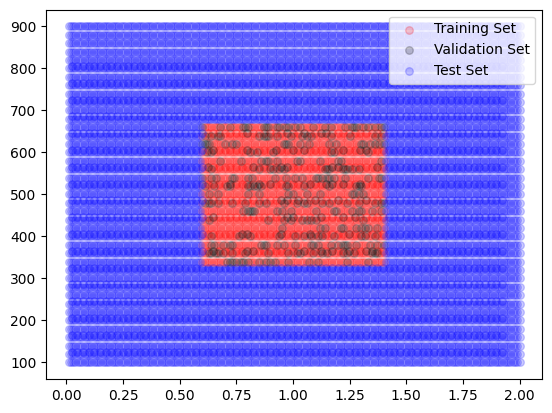

In [134]:
import pandas as pd
path = f'{root}/data'

filename = 'tdsf_002_train.pickle'
df_train_all = pd.read_pickle(path + '/' + filename)

filename = 'tdsf_002_val.pickle'
df_test_all = pd.read_pickle(path + '/' + filename)

df_data_all = pd.concat([df_train_all, df_test_all], axis=0)


#%% Select Material

# [Tuff-Rhyolite, Granite, Shale, Salt, Wet-Granite, Wet-Tuff]

name_prefix = '_FAR.'
name_material = 'Tuff-Rhyolite'

df_data = df_data_all[df_data_all['material'] == name_prefix + name_material]
df_data = df_data.reset_index(drop=True)

# round YIELD and DEPTH to 2 decimal places
df_data.YIELD = df_data.YIELD.round(2)
df_data.DEPTH = df_data.DEPTH.round(2)

# splits df into train and test by yield and depth quantiles
qnts = [.7, .3]
ylds, dpths = df_data.YIELD.quantile(qnts, interpolation='nearest'), df_data.DEPTH.quantile(qnts, interpolation='nearest')
train_qnt = (df_data.YIELD >= ylds.min()) & (df_data.YIELD <= ylds.max()) & (df_data.DEPTH >= dpths.min()) & (df_data.DEPTH <= dpths.max())

# split data into train and test by domain (inner and outer)
df_train = df_data[train_qnt].reset_index(drop=True)
df_test = df_data[~train_qnt].reset_index(drop=True)

# split train into train and validation, randomly selected from the inner domain
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=0)
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)


# plot train and test yields and depths
s = 30
plt.figure()
plt.scatter(df_train.YIELD, df_train.DEPTH, label='Training Set', color='red', alpha=0.2, s=s)
plt.scatter(df_val.YIELD, df_val.DEPTH, label='Validation Set', color='black', alpha=0.2, s=s)
plt.scatter(df_test.YIELD, df_test.DEPTH, label='Test Set', color='blue', alpha=0.2, s=s)
plt.legend()

/tmp/ipykernel_5474/1894160339.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


/home/mitch/PythonProjects/tdsf/results/noise_study_ood_domain_no_phy_smaller/0.0
(795300, 1) (795300, 1) (795300, 3)
(130600, 1) (130600, 1) (130600, 3)
(32700, 1) (32700, 1) (32700, 3)
0.0033385672 0.00023689034
/home/mitch/PythonProjects/tdsf/results/noise_study_ood_domain_no_phy_smaller/0.2
(795300, 1) (795300, 1) (795300, 3)
(130600, 1) (130600, 1) (130600, 3)
(32700, 1) (32700, 1) (32700, 3)
0.002737354 0.00056896853
/home/mitch/PythonProjects/tdsf/results/noise_study_ood_domain_no_phy_smaller/0.5
(795300, 1) (795300, 1) (795300, 3)
(130600, 1) (130600, 1) (130600, 3)
(32700, 1) (32700, 1) (32700, 3)
0.0028860674 0.00063952873


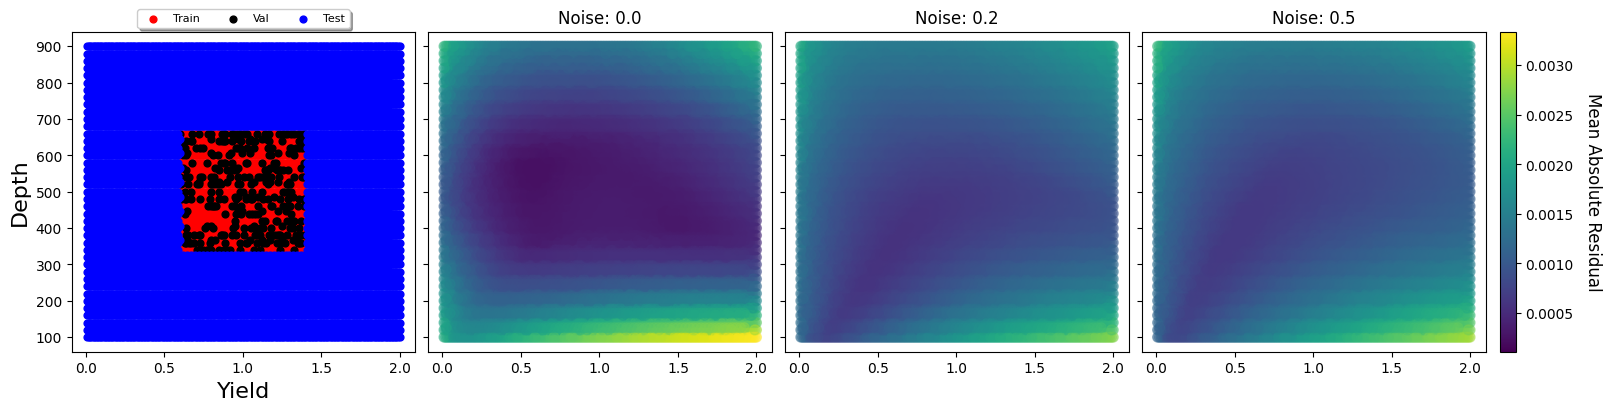

In [139]:
import os 
root = os.path.abspath('')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import scipy.io as sio

from matplotlib.colors import Colormap
from matplotlib import cm




# noise_study_ood_phy_domain_sampled, norm = plt.Normalize(0.00010848209, 0.002615124)
# noise_study_ood_domain_no_phy, norm = plt.Normalize(0.0001390961, 0.0025011438) 
# superset, norm = plt.Normalize(0.00010848209, 0.002615124) 
norm = plt.Normalize(0.00010848209, 0.0033385672) 
cmap = cm.get_cmap('viridis')
im = cm.ScalarMappable(norm=norm, cmap=cmap)

studies = ['noise_study_ood_domain_no_phy_smaller']
sigmas = [0.00, 0.2, 0.5]
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(16,4), layout='compressed')
axs = axs.ravel()
ax = axs[0]
s = 24
ax.scatter(df_train.YIELD, df_train.DEPTH, label='Train', color='red', alpha=1, s=s)
ax.scatter(df_val.YIELD, df_val.DEPTH, label='Val', color='black', alpha=1, s=s)
ax.scatter(df_test.YIELD, df_test.DEPTH, label='Test', color='blue', alpha=1, s=s)
ax.set_ylabel('Depth', fontsize=16)
ax.set_xlabel('Yield', fontsize=16)
ax.legend(ncol=3, loc='upper center', fontsize=8, bbox_to_anchor=(0.5, 1.07), fancybox=True, shadow=True, borderaxespad=0)
# ax.set_title(f'Splits')
i = 1
for study in studies:
    for sigma in sigmas:
        ax = axs[i]
                
        d = f'{root}/results/{study}/{sigma}'
        print(d)
        mat = sio.loadmat(f'{d}/SeismicWave_TDSF_forward_PGNN_v1_result.mat')
        Ymax, Ymin, Xmax, Xmin = mat['Ymax'], mat['Ymin'], mat['Xmax'], mat['Xmin']
        
        Yhat_test, Ytest, Xtest  = mat['Yhat_test'], mat['Ytest'], mat['Xtest']
        Yhat_train, Ytrain, Xtrain = mat['Yhat_train'], mat['Ytrain'], mat['Xtrain']
        Yhat_val, Yval, Xval = mat['Yhat_val'], mat['Yval'], mat['Xval']
        
        print(Yhat_test.shape, Ytest.shape, Xtest.shape)
        print(Yhat_train.shape, Ytrain.shape, Xtrain.shape)
        print(Yhat_val.shape, Yval.shape, Xval.shape)
        
        Ymax, Ymin, Xmax, Xmin = Ymax[0,0], Ymin[0,0], Xmax[0,0], Xmin[0,0]
        
        n_t = 100
        Xplot = np.vstack([Xtrain, Xval, Xtest])
        Yplot = np.vstack([Ytrain, Yval, Ytest])
        Yhat_plot = np.vstack([Yhat_train, Yhat_val, Yhat_test])
        n = int(Xplot.shape[0]//n_t)
        w = np.unique(Xplot[:,0].reshape(n, n_t), axis=1)
        h = np.unique(Xplot[:,1].reshape(n, n_t), axis=1)
        residuals = (abs(Yhat_plot.reshape(n, n_t) - Yplot.reshape(n, n_t))).mean(axis=1)
        print(residuals.max(), residuals.min())
        ax.scatter(w, h, c=residuals, cmap=cmap, s = 50, alpha=0.5, norm=norm)
        # ax.set_cmap(norm)
        ax.set_title(f'Noise: {sigma}')

        i+=1



cbar = fig.colorbar(im, ax=axs.ravel().tolist(), pad=0.01)
# fig.tight_layout()
cbar.set_label('Mean Absolute Residual', fontsize=12, rotation=270, labelpad=20)
plt.savefig(f'{root}/results/{study}/disp_resid_v_yield_depth.png')
plt.show()
        



/tmp/ipykernel_5474/2506381138.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


noise_study_ood_domain_no_phy_smaller, 0.0, 0.0003571370034478605, 0.00036539172288030386, 0.001038501039147377
noise_study_ood_domain_no_phy_smaller, 0.2, 0.0007193219498731196, 0.000731337524484843, 0.0011518104001879692
noise_study_ood_domain_no_phy_smaller, 0.5, 0.0007857815362513065, 0.0007976869237609208, 0.001215183874592185
noise_study_ood_domain_phy_smaller, 0.0, 0.0003302418626844883, 0.0003383660514373332, 0.0010337666608393192
noise_study_ood_domain_phy_smaller, 0.2, 0.0003687811258714646, 0.0003759532410185784, 0.000911777897272259
noise_study_ood_domain_phy_smaller, 0.5, 0.0006239200592972338, 0.0006299960659816861, 0.0009888920467346907
noise_study_ood_domain_no_phy, 0.0, 0.00022009250824339688, 0.00022183867986314, 0.0003700484521687031
noise_study_ood_domain_no_phy, 0.2, 0.00045584808685816824, 0.0004529149446170777, 0.0007699854904785752
noise_study_ood_domain_no_phy, 0.5, 0.0007062584045343101, 0.0007047360413707793, 0.0010880157351493835
noise_study_ood_phy_domain_s

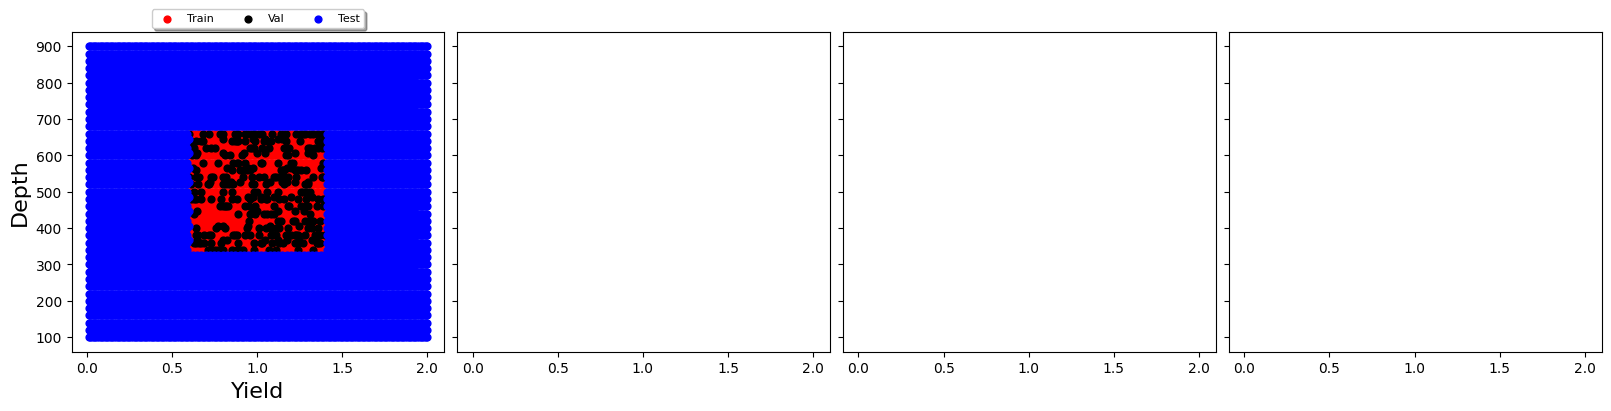

In [144]:
import os 
root = os.path.abspath('')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import scipy.io as sio

from matplotlib.colors import Colormap
from matplotlib import cm




# noise_study_ood_phy_domain_sampled, norm = plt.Normalize(0.00010848209, 0.002615124)
# noise_study_ood_domain_no_phy, norm = plt.Normalize(0.0001390961, 0.0025011438) 
# superset, norm = plt.Normalize(0.00010848209, 0.002615124) 
norm = plt.Normalize(0.00010848209, 0.0033385672) 
cmap = cm.get_cmap('viridis')
im = cm.ScalarMappable(norm=norm, cmap=cmap)

# studies = ['noise_study_ood_domain_no_phy_smaller','noise_study_ood_domain_phy_smaller' ]
studies = ['noise_study_ood_domain_no_phy_smaller','noise_study_ood_domain_phy_smaller', 'noise_study_ood_domain_no_phy','noise_study_ood_phy_domain_sampled']
sigmas = [0.00, 0.2, 0.5]
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(16,4), layout='compressed')
axs = axs.ravel()
ax = axs[0]
s = 24
ax.scatter(df_train.YIELD, df_train.DEPTH, label='Train', color='red', alpha=1, s=s)
ax.scatter(df_val.YIELD, df_val.DEPTH, label='Val', color='black', alpha=1, s=s)
ax.scatter(df_test.YIELD, df_test.DEPTH, label='Test', color='blue', alpha=1, s=s)
ax.set_ylabel('Depth', fontsize=16)
ax.set_xlabel('Yield', fontsize=16)
ax.legend(ncol=3, loc='upper center', fontsize=8, bbox_to_anchor=(0.5, 1.07), fancybox=True, shadow=True, borderaxespad=0)
# ax.set_title(f'Splits')
i = 1
for study in studies:
    for sigma in sigmas:
                
        d = f'{root}/results/{study}/{sigma}'
        # print(d)
        mat = sio.loadmat(f'{d}/SeismicWave_TDSF_forward_PGNN_v1_result.mat')
        Ymax, Ymin, Xmax, Xmin = mat['Ymax'], mat['Ymin'], mat['Xmax'], mat['Xmin']
        Ymax, Ymin, Xmax, Xmin = Ymax[0,0], Ymin[0,0], Xmax[0,0], Xmin[0,0]

        Yhat_test, Ytest, Xtest  = mat['Yhat_test'], mat['Ytest'], mat['Xtest']
        Yhat_train, Ytrain, Xtrain = mat['Yhat_train'], mat['Ytrain'], mat['Xtrain']
        Yhat_val, Yval, Xval = mat['Yhat_val'], mat['Yval'], mat['Xval']
        
        
        
        
        resid_test = abs(Yhat_test - Ytest)
        resid_train = abs(Yhat_train - Ytrain)
        resid_val = abs(Yhat_val - Yval)
        print(f'{study}, {sigma}, {resid_train.mean()}, {resid_val.mean()}, {resid_test.mean()}')

        



# Plot Examples

/tmp/ipykernel_850/549114420.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


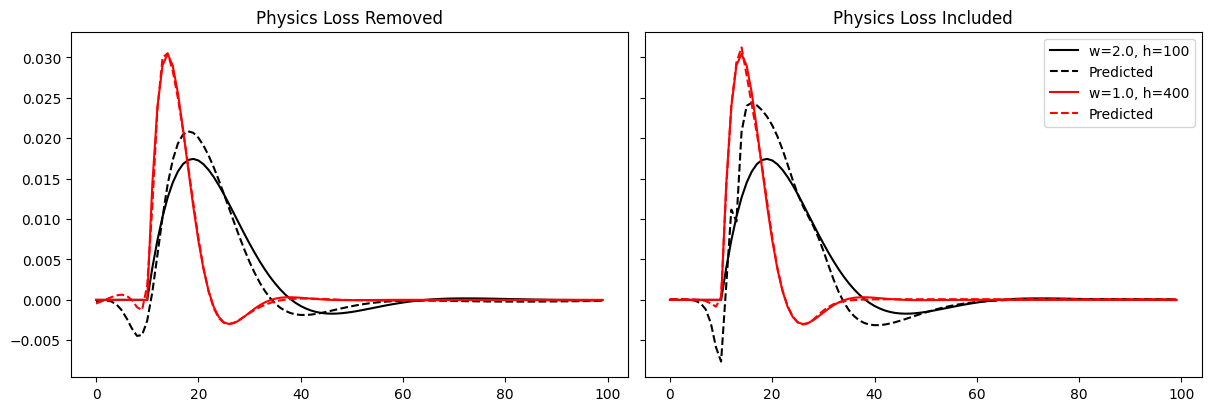

In [50]:
import os 
root = os.path.abspath('')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import scipy.io as sio

from matplotlib.colors import Colormap
from matplotlib import cm




# noise_study_ood_phy_domain_sampled, norm = plt.Normalize(0.00010848209, 0.002615124)
# noise_study_ood_domain_no_phy, norm = plt.Normalize(0.0001390961, 0.0025011438) 
# superset, norm = plt.Normalize(0.00010848209, 0.002615124) 
norm = plt.Normalize(0.00010848209, 0.0033385672) 
cmap = cm.get_cmap('viridis')
im = cm.ScalarMappable(norm=norm, cmap=cmap)

# studies = ['noise_study_ood_domain_no_phy_smaller','noise_study_ood_domain_phy_smaller' ]
studies = ['noise_study_ood_domain_no_phy','noise_study_ood_phy_domain_sampled']
sigmas = [0.00]
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12 ,4), layout='compressed')
axs = axs.ravel()

# ax.set_title(f'Splits')
for study in studies:
    for sigma in sigmas:
                
        d = f'{root}/results/{study}/{sigma}'
        # print(d)
        mat = sio.loadmat(f'{d}/SeismicWave_TDSF_forward_PGNN_v1_result.mat')
        Ymax, Ymin, Xmax, Xmin = mat['Ymax'], mat['Ymin'], mat['Xmax'], mat['Xmin']
        Ymax, Ymin, Xmax, Xmin = Ymax[0,0], Ymin[0,0], Xmax[0,0], Xmin[0,0]

        Yhat_test, Ytest, Xtest  = mat['Yhat_test'], mat['Ytest'], mat['Xtest']
        Yhat_train, Ytrain, Xtrain = mat['Yhat_train'], mat['Ytrain'], mat['Xtrain']
        Yhat_val, Yval, Xval = mat['Yhat_val'], mat['Yval'], mat['Xval']
        
        n_t = 100
        Xplot = np.vstack([Xtrain, Xval, Xtest])
        n = int(Xplot.shape[0]//n_t)
        w = np.unique(Xplot[:,0].reshape(n, n_t), axis=1)
        h = np.unique(Xplot[:,1].reshape(n, n_t), axis=1)

        Yplot = np.vstack([Ytrain, Yval, Ytest]).reshape(n, n_t)
        Yhat_plot = np.vstack([Yhat_train, Yhat_val, Yhat_test]).reshape(n, n_t)
        
        ex1 = np.where((w==2.0) & (h==100.))[0]
        ex1_true = Yplot[ex1][0,:]
        ex1_pred = Yhat_plot[ex1][0,:]

        ex2 = np.where((w==1.0) & (h==400.))[0]
        ex2_true = Yplot[ex2][0,:]
        ex2_pred = Yhat_plot[ex2][0,:]

        if 'no_phy' in study: 
            ax = axs[0]
            ax.set_title('Physics Loss Removed')
        else: 
            ax = axs[1]
            ax.set_title('Physics Loss Included')
            

        ax.plot(ex1_true, c='black', linestyle='-', label='True')
        ax.plot(ex1_pred, c='black', linestyle='--', label='Predicted')

        ax.plot(ex2_true, c='red', linestyle='-', label='True')
        ax.plot(ex2_pred, c='red', linestyle='--', label='Predicted')
        # ax.set_title(f'Noise: {sigma}')
        
    axs[1].legend(['w=2.0, h=100', 'Predicted', 'w=1.0, h=400', 'Predicted'])



/tmp/ipykernel_850/2867532509.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


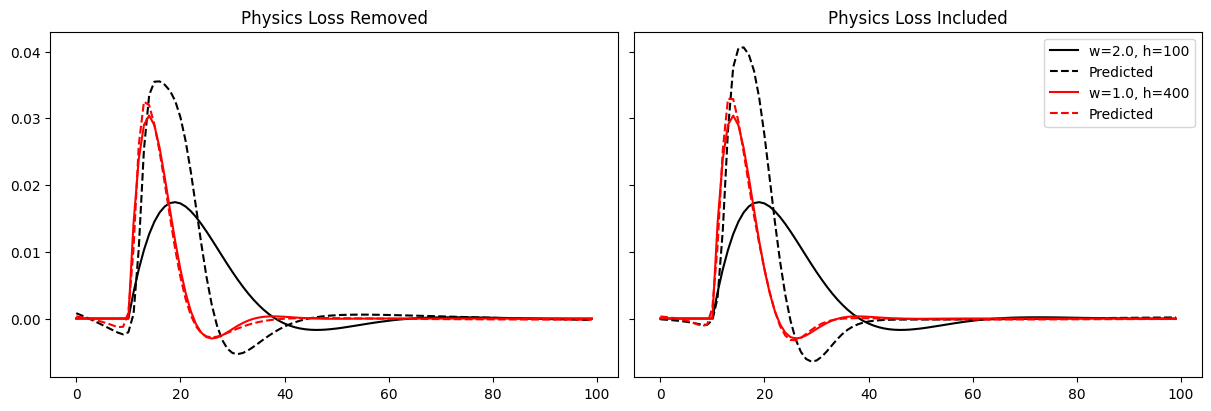

In [51]:
import os 
root = os.path.abspath('')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import scipy.io as sio

from matplotlib.colors import Colormap
from matplotlib import cm




# noise_study_ood_phy_domain_sampled, norm = plt.Normalize(0.00010848209, 0.002615124)
# noise_study_ood_domain_no_phy, norm = plt.Normalize(0.0001390961, 0.0025011438) 
# superset, norm = plt.Normalize(0.00010848209, 0.002615124) 
norm = plt.Normalize(0.00010848209, 0.0033385672) 
cmap = cm.get_cmap('viridis')
im = cm.ScalarMappable(norm=norm, cmap=cmap)

# studies = ['noise_study_ood_domain_no_phy_smaller','noise_study_ood_domain_phy_smaller' ]
studies = ['noise_study_ood_domain_no_phy_smaller','noise_study_ood_domain_phy_smaller']
sigmas = [0.00]
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12,4), layout='compressed')
axs = axs.ravel()

# ax.set_title(f'Splits')
for study in studies:
    for sigma in sigmas:
                
        d = f'{root}/results/{study}/{sigma}'
        # print(d)
        mat = sio.loadmat(f'{d}/SeismicWave_TDSF_forward_PGNN_v1_result.mat')
        Ymax, Ymin, Xmax, Xmin = mat['Ymax'], mat['Ymin'], mat['Xmax'], mat['Xmin']
        Ymax, Ymin, Xmax, Xmin = Ymax[0,0], Ymin[0,0], Xmax[0,0], Xmin[0,0]

        Yhat_test, Ytest, Xtest  = mat['Yhat_test'], mat['Ytest'], mat['Xtest']
        Yhat_train, Ytrain, Xtrain = mat['Yhat_train'], mat['Ytrain'], mat['Xtrain']
        Yhat_val, Yval, Xval = mat['Yhat_val'], mat['Yval'], mat['Xval']
        
        n_t = 100
        Xplot = np.vstack([Xtrain, Xval, Xtest])
        n = int(Xplot.shape[0]//n_t)
        w = np.unique(Xplot[:,0].reshape(n, n_t), axis=1)
        h = np.unique(Xplot[:,1].reshape(n, n_t), axis=1)

        Yplot = np.vstack([Ytrain, Yval, Ytest]).reshape(n, n_t)
        Yhat_plot = np.vstack([Yhat_train, Yhat_val, Yhat_test]).reshape(n, n_t)
        
        ex1 = np.where((w==2.0) & (h==100.))[0]
        ex1_true = Yplot[ex1][0,:]
        ex1_pred = Yhat_plot[ex1][0,:]

        ex2 = np.where((w==1.0) & (h==400.))[0]
        ex2_true = Yplot[ex2][0,:]
        ex2_pred = Yhat_plot[ex2][0,:]

        if 'no_phy' in study: 
            ax = axs[0]
            ax.set_title('Physics Loss Removed')
        else: 
            ax = axs[1]
            ax.set_title('Physics Loss Included')
            plt.legend(['w=2.0, h=100', 'Predicted', 'w=1.0, h=400', 'Predicted'])

        ax.plot(ex1_true, c='black', linestyle='-', label='True')
        ax.plot(ex1_pred, c='black', linestyle='--', label='Predicted')

        ax.plot(ex2_true, c='red', linestyle='-', label='True')
        ax.plot(ex2_pred, c='red', linestyle='--', label='Predicted')
        # ax.set_title(f'Noise: {sigma}')
        
    axs[1].legend(['w=2.0, h=100', 'Predicted', 'w=1.0, h=400', 'Predicted'])



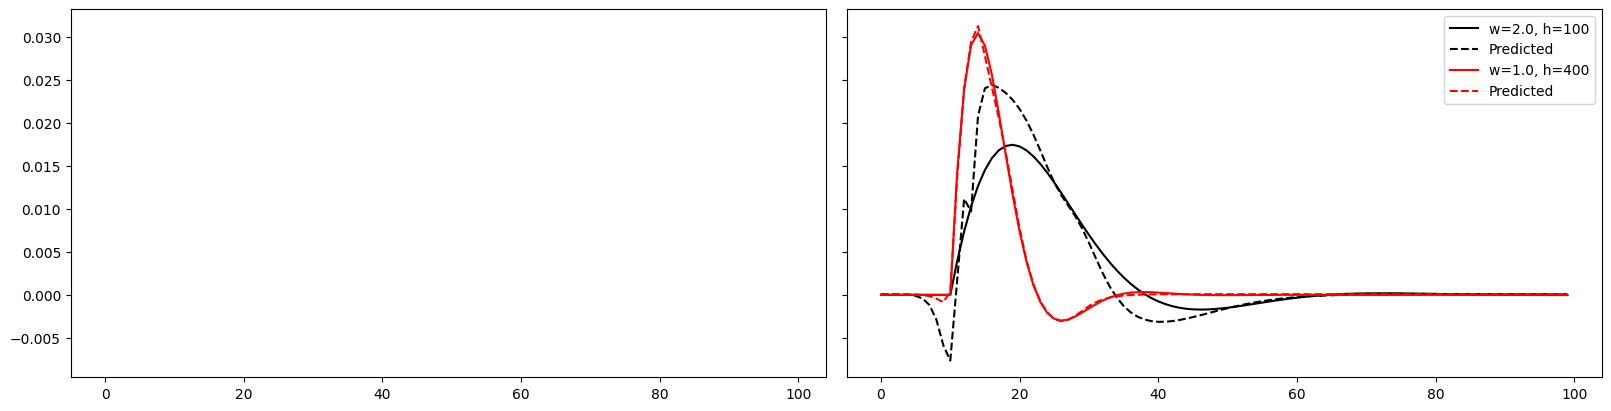

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(16,4), layout='compressed')
axs = axs.ravel()

ex1 = np.where((w==2.0) & (h==100.))[0]
ex1_true = Yplot[ex1][0,:]
ex1_pred = Yhat_plot[ex1][0,:]

ex2 = np.where((w==1.0) & (h==400.))[0]
ex2_true = Yplot[ex2][0,:]
ex2_pred = Yhat_plot[ex2][0,:]

if 'no_phy' in study: ax = axs[0]
else: ax = axs[1]

ax.plot(ex1_true, c='black', linestyle='-', label='True')
ax.plot(ex1_pred, c='black', linestyle='--', label='Predicted')

ax.plot(ex2_true, c='red', linestyle='-', label='True')
ax.plot(ex2_pred, c='red', linestyle='--', label='Predicted')



In [27]:
np.where((w==1.0) & (h==400.))

(array([400]), array([0]))

In [ ]:
import os 
root = os.path.abspath('')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import scipy.io as sio

# 'noise_study_ood'
# noise_study_ood_phy_domain_sampled
studies = ['noise_study_ood_phy_domain_sampled']
sigmas = [0.00, 0.2, 0.5] # 0.01, 0.1, 0.2,

for study in studies:
    for sigma in sigmas:
        d = f'{root}/results/{study}/{sigma}'
        print(d)
        mat = sio.loadmat(f'{d}/SeismicWave_TDSF_forward_PGNN_v1_result.mat')
        Ymax, Ymin, Xmax, Xmin = mat['Ymax'], mat['Ymin'], mat['Xmax'], mat['Xmin']
        
        Yhat_test, Ytest, Xtest  = mat['Yhat_test'], mat['Ytest'], mat['Xtest']
        Yhat_train, Ytrain, Xtrain = mat['Yhat_train'], mat['Ytrain'], mat['Xtrain']
        Yhat_val, Yval, Xval = mat['Yhat_val'], mat['Yval'], mat['Xval']
        
        Ymax, Ymin, Xmax, Xmin = Ymax[0,0], Ymin[0,0], Xmax[0,0], Xmin[0,0]

        n_t = 100
        n_test = int(Ytest.shape[0]//n_t)
        t = Xtest[:,-1].reshape(n_test, n_t)
        residuals = Ytest.reshape(n_test, n_t) - Yhat.reshape(n_test, n_t)

        ax = sns.lineplot(x=t.reshape(-1,1)[:,0], y=residuals.reshape(-1,1)[:,0], alpha=0.5, errorbar='sd', label=f'{sigma}')

plt.xlabel('Time')
plt.ylabel('Residual')
plt.legend()
plt.savefig(f'{root}/results/{study}/disp_resid_v_time_errbar.png')
plt.show()

        
        



# Recompute predictions

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Aug 29 15:39:51 2023

This script trains PINN model for TDSF supplied by AFTAC-CRADA
Inputs: yield (w), depth (h), time (t)
Output: displacement (S)

@author: shhong
"""

#%% Load Moduels

import os
root = os.path.abspath('')
# root = '/home/ubuntu/tdsf'

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import scipy.io as sio
import matplotlib.pyplot as plt

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from timeit import default_timer as timer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# from sklearn.metrics import confusion_matrix
# from sklearn.preprocessing import OneHotEncoder

# device = torch.device('cuda:0')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

study = 'noise_study_ood_phy_domain_sampled'

#%% Load Data

# path = 'E:\Hong\Research Projects\PINN\Data'
path = f'{root}/data'

filename = 'tdsf_002_train.pickle'
df_train_all = pd.read_pickle(path + '/' + filename)

filename = 'tdsf_002_val.pickle'
df_test_all = pd.read_pickle(path + '/' + filename)

df_data_all = pd.concat([df_train_all, df_test_all], axis=0)


#%% Select Material

# [Tuff-Rhyolite, Granite, Shale, Salt, Wet-Granite, Wet-Tuff]

name_prefix = '_FAR.'
name_material = 'Tuff-Rhyolite'

df_data = df_data_all[df_data_all['material'] == name_prefix + name_material]
df_data = df_data.reset_index(drop=True)

# round YIELD and DEPTH to 2 decimal places
df_data.YIELD = df_data.YIELD.round(2)
df_data.DEPTH = df_data.DEPTH.round(2)

# splits df into train and test by yield and depth quantiles
qnts = [.1, .9]
ylds, dpths = df_data.YIELD.quantile(qnts, interpolation='nearest'), df_data.DEPTH.quantile(qnts, interpolation='nearest')
train_qnt = (df_data.YIELD >= ylds.min()) & (df_data.YIELD <= ylds.max()) & (df_data.DEPTH >= dpths.min()) & (df_data.DEPTH <= dpths.max())

# split data into train and test by domain (inner and outer)
df_train = df_data[train_qnt].reset_index(drop=True)
df_test = df_data[~train_qnt].reset_index(drop=True)

# split train into train and validation, randomly selected from the inner domain
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=0)
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)


# plot train and test yields and depths
s = 30
plt.figure()
plt.scatter(df_train.YIELD, df_train.DEPTH, label='Training Set', color='red', alpha=0.2, s=s)
plt.scatter(df_val.YIELD, df_val.DEPTH, label='Validation Set', color='black', alpha=0.2, s=s)
plt.scatter(df_test.YIELD, df_test.DEPTH, label='Test Set', color='blue', alpha=0.2, s=s)
plt.xlabel('Yield')
plt.ylabel('Depth')
plt.legend()
plt.title('Data Domains')
plt.savefig(f'{root}/results/{study}/domains.png')
# plt.close('all')
plt.show()


In [ ]:

#%% Data Arrangement

trunc = 1000
ds = 10
dt = 0.001

tv = np.arange(1,trunc+1)*dt
tv = tv[::ds]

# Define Train Set
tdsf = df_train.DATA
wvec = df_train.YIELD
hvec = df_train.DEPTH
t_tdsf = tdsf[0][:trunc]
Xtrain = np.concatenate((wvec[0]*np.ones((tv.size,1)), hvec[0]*np.ones((tv.size,1)), np.reshape(tv,(-1,1))), axis=1)
Ytrain = np.reshape(t_tdsf[::ds], (-1,1))
for ndx in range(1, df_train.shape[0]):
    t_tdsf = tdsf[ndx][:trunc]
    Xtemp = np.concatenate((wvec[ndx]*np.ones((tv.size,1)), hvec[ndx]*np.ones((tv.size,1)), np.reshape(tv,(-1,1))), axis=1)        
    Xtrain = np.concatenate((Xtrain, Xtemp), axis=0)
    Ytrain = np.concatenate((Ytrain, np.reshape(t_tdsf[::ds], (-1,1))), axis=0)
Xtrain = Xtrain.astype(np.float32)
Ytrain = Ytrain.astype(np.float32)

# Define Val Set
tdsf = df_val.DATA
wvec = df_val.YIELD
hvec = df_val.DEPTH
t_tdsf = tdsf[0][:trunc]
Xval = np.concatenate((wvec[0]*np.ones((tv.size,1)), hvec[0]*np.ones((tv.size,1)), np.reshape(tv,(-1,1))), axis=1)
Yval = np.reshape(t_tdsf[::ds], (-1,1))
for ndx in range(1, df_val.shape[0]):
    t_tdsf = tdsf[ndx][:trunc]
    Xtemp = np.concatenate((wvec[ndx]*np.ones((tv.size,1)), hvec[ndx]*np.ones((tv.size,1)), np.reshape(tv,(-1,1))), axis=1)        
    Xval = np.concatenate((Xval, Xtemp), axis=0)
    Yval = np.concatenate((Yval, np.reshape(t_tdsf[::ds], (-1,1))), axis=0)
Xval = Xval.astype(np.float32)
Yval = Yval.astype(np.float32)

# Define Test Set
tdsf = df_test.DATA
wvec = df_test.YIELD
hvec = df_test.DEPTH
t_tdsf = tdsf[0][:trunc]
Xtest = np.concatenate((wvec[0]*np.ones((tv.size,1)), hvec[0]*np.ones((tv.size,1)), np.reshape(tv,(-1,1))), axis=1)
Ytest = np.reshape(t_tdsf[::ds], (-1,1))
for ndx in range(1, df_test.shape[0]):
    t_tdsf = tdsf[ndx][:trunc]
    Xtemp = np.concatenate((wvec[ndx]*np.ones((tv.size,1)), hvec[ndx]*np.ones((tv.size,1)), np.reshape(tv,(-1,1))), axis=1)        
    Xtest = np.concatenate((Xtest, Xtemp), axis=0)
    Ytest = np.concatenate((Ytest, np.reshape(t_tdsf[::ds], (-1,1))), axis=0)
Xtest = Xtest.astype(np.float32)
Ytest = Ytest.astype(np.float32)


#%% Preprocessing

# Min-Max Normalization
Xscaler = MinMaxScaler()
Xscaler.fit(np.vstack([Xtrain, Xval, Xtest]))
MaxX = Xscaler.data_max_
MinX = Xscaler.data_min_

Yscaler = MinMaxScaler()
Yscaler.fit(np.vstack([Ytrain, Yval, Ytest]))
MaxY = Yscaler.data_max_
MinY = Yscaler.data_min_

Ztrain = Yscaler.transform(Ytrain)
Zval = Yscaler.transform(Yval)
Ztest = Yscaler.transform(Ytest)

# Shuffle Data
numdata = Xtrain.shape[0]
Ztrain_base = Ztrain.copy()


In [ ]:
# Fully Connected NN
class FCNN_Net(nn.Module):

    def __init__(self, numIn, numOut):
        super(FCNN_Net, self).__init__()
        self.fc1 = nn.Linear(numIn, 128)
        self.fc2 = nn.Linear(128, 6)
        self.fc3 = nn.Linear(6, numOut)
        
    def forward(self, w, h, t):        
        inputs = torch.cat([w,h,t],axis=1) # combined two arrays of 1 columns each to one array of 2 columns        
        # in_size = x.size(0)
        # inputs = x.view(in_size, -1)
        layer1_out = torch.tanh(self.fc1(inputs))
        layer2_out = torch.tanh(self.fc2(layer1_out))
        output = (self.fc3(layer2_out))
        return output

In [ ]:
import os 
root = os.path.abspath('')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import scipy.io as sio

# 'noise_study_ood'
# noise_study_ood_phy_domain_sampled
studies = ['noise_study_ood_phy_domain_sampled']
sigmas = [0.00, 0.01, 0.1, 0.2, 0.5] 

for study in studies:
    for sigma in sigmas:
        d = f'{root}/results/{study}/{sigma}'
        print(d)
        mat = sio.loadmat(f'{d}/SeismicWave_TDSF_forward_PGNN_v1_result.mat')

        Yhat_test, Ytest, Xtest, Ymax, Ymin, Xmax, Xmin = mat['Yhat_test'], mat['Ytest'], mat['Xtest'], mat['Ymax'], mat['Ymin'], mat['Xmax'], mat['Xmin']

        model_data = torch.load(f'{d}/SeismicWave_TDSF_forward_PGNN_v1.pth')
        model = model_data['model']
        model.load_state_dict(model_data['state_dict'])

        model.to('cpu')
        model.eval()

        # validation set
        Xin = (Xval-MinX)/(MaxX-MinX)
        Xt = torch.from_numpy(Xin)
        Zhat = model(torch.reshape(Xt[:,0], (-1,1)), torch.reshape(Xt[:,1], (-1,1)), torch.reshape(Xt[:,2], (-1,1)))
        Zhat = Zhat.detach().numpy()
        Yhat_val = Yscaler.inverse_transform(Zhat)


        # train set
        Xin = (Xtrain-MinX)/(MaxX-MinX)
        Xt = torch.from_numpy(Xin)
        Zhat = model(torch.reshape(Xt[:,0], (-1,1)), torch.reshape(Xt[:,1], (-1,1)), torch.reshape(Xt[:,2], (-1,1)))
        Zhat = Zhat.detach().numpy()
        Yhat_train = Yscaler.inverse_transform(Zhat)

        filename = f'{d}/SeismicWave_TDSF_forward_PGNN_v1_result.mat'
        sio.savemat(filename, 
                {
                'Yhat_train':Yhat_train, 'Ytrain':Ytrain, 'Xtrain':Xtrain,
                'Yhat_test':Yhat_test, 'Ytest':Ytest, 'Xtest':Xtest, 
                'Yhat_val':Yhat_val,'Yval':Yval, 'Xval':Xval,
                'Ymax':MaxY, 'Ymin':MinY, 'Xmax':MaxX, 'Xmin':MinX
                })

In [ ]:
f'{root}/results/{study}/disp_resid_v_yield_depth.png'

In [ ]:
np.unique(w, axis=1).shape, np.unique(h, axis=1).shape

In [ ]:
np.unique(w, axis=1)

In [161]:
import pandas as pd
df = pd.read_csv('results/results.csv')
df = df.melt(id_vars=['Study', 'Train Domain', 'Physics Loss?', 'Noise Level'], var_name='Split', value_name='Loss').reset_index(drop=True)
df

Study Train Domain  Physics Loss?  \
0   noise_study_ood_domain_no_phy_smaller        Small          False   
1   noise_study_ood_domain_no_phy_smaller        Small          False   
2   noise_study_ood_domain_no_phy_smaller        Small          False   
3      noise_study_ood_domain_phy_smaller        Small           True   
4      noise_study_ood_domain_phy_smaller        Small           True   
5      noise_study_ood_domain_phy_smaller        Small           True   
6           noise_study_ood_domain_no_phy          Big          False   
7           noise_study_ood_domain_no_phy          Big          False   
8           noise_study_ood_domain_no_phy          Big          False   
9      noise_study_ood_phy_domain_sampled          Big           True   
10     noise_study_ood_phy_domain_sampled          Big           True   
11     noise_study_ood_phy_domain_sampled          Big           True   
12  noise_study_ood_domain_no_phy_smaller        Small          False   
13  noise_study_ood_domain_no_phy_smaller        Small          False   
14  noise_study_ood_domain_no_phy_smaller        Small          False   
15     noise_study_ood_domain_phy_smaller        Small           True   
16     noise_study_ood_domain_phy_smaller        Small           True   
17     noise_study_ood_domain_phy_smaller        Small           True   
18          noise_study_ood_domain_no_phy          Big          False   
19          noise_study_ood_domain_no_phy          Big          False   
20          noise_study_ood_domain_no_phy          Big          False   
21     noise_study_ood_phy_domain_sampled          Big           True   
22     noise_study_ood_phy_domain_sampled          Big           True   
23     noise_study_ood_phy_domain_sampled          Big           True   
24  noise_study_ood_domain_no_phy_smaller        Small          False   
25  noise_study_ood_domain_no_phy_smaller        Small          False   
26  noise_study_ood_domain_no_phy_smaller        Small          False   
27     noise_study_ood_domain_phy_smaller        Small           True   
28     noise_study_ood_domain_phy_smaller        Small           True   
29     noise_study_ood_domain_phy_smaller        Small           True   
30          noise_study_ood_domain_no_phy          Big          False   
31          noise_study_ood_domain_no_phy          Big          False   
32          noise_study_ood_domain_no_phy          Big          False   
33     noise_study_ood_phy_domain_sampled          Big           True   
34     noise_study_ood_phy_domain_sampled          Big           True   
35     noise_study_ood_phy_domain_sampled          Big           True   

    Noise Level        Split     Loss  
0           0.0  MAE - Train  0.00036  
1           0.2  MAE - Train  0.00072  
2           0.5  MAE - Train  0.00079  
3           0.0  MAE - Train  0.00033  
4           0.2  MAE - Train  0.00037  
5           0.5  MAE - Train  0.00062  
6           0.0  MAE - Train  0.00022  
7           0.2  MAE - Train  0.00046  
8           0.5  MAE - Train  0.00071  
9           0.0  MAE - Train  0.00017  
10          0.2  MAE - Train  0.00036  
11          0.5  MAE - Train  0.00101  
12          0.0   MAE - Test  0.00037  
13          0.2   MAE - Test  0.00073  
14          0.5   MAE - Test  0.00080  
15          0.0   MAE - Test  0.00034  
16          0.2   MAE - Test  0.00038  
17          0.5   MAE - Test  0.00063  
18          0.0   MAE - Test  0.00022  
19          0.2   MAE - Test  0.00045  
20          0.5   MAE - Test  0.00070  
21          0.0   MAE - Test  0.00017  
22          0.2   MAE - Test  0.00036  
23          0.5   MAE - Test  0.00102  
24          0.0    MAE - Val  0.00104  
25          0.2    MAE - Val  0.00115  
26          0.5    MAE - Val  0.00122  
27          0.0    MAE - Val  0.00103  
28          0.2    MAE - Val  0.00091  
29          0.5    MAE - Val  0.00099  
30          0.0    MAE - Val  0.00037  
31          0.2    MAE - Val  0.00077  
32          0.

Study Train Domain  Physics Loss?  \
0   noise_study_ood_domain_no_phy_smaller        Small          False   
1   noise_study_ood_domain_no_phy_smaller        Small          False   
2   noise_study_ood_domain_no_phy_smaller        Small          False   
3      noise_study_ood_domain_phy_smaller        Small           True   
4      noise_study_ood_domain_phy_smaller        Small           True   
5      noise_study_ood_domain_phy_smaller        Small           True   
6           noise_study_ood_domain_no_phy          Big          False   
7           noise_study_ood_domain_no_phy          Big          False   
8           noise_study_ood_domain_no_phy          Big          False   
9      noise_study_ood_phy_domain_sampled          Big           True   
10     noise_study_ood_phy_domain_sampled          Big           True   
11     noise_study_ood_phy_domain_sampled          Big           True   
12  noise_study_ood_domain_no_phy_smaller        Small          False   
13  noise_study_ood_domain_no_phy_smaller        Small          False   
14  noise_study_ood_domain_no_phy_smaller        Small          False   
15     noise_study_ood_domain_phy_smaller        Small           True   
16     noise_study_ood_domain_phy_smaller        Small           True   
17     noise_study_ood_domain_phy_smaller        Small           True   
18          noise_study_ood_domain_no_phy          Big          False   
19          noise_study_ood_domain_no_phy          Big          False   
20          noise_study_ood_domain_no_phy          Big          False   
21     noise_study_ood_phy_domain_sampled          Big           True   
22     noise_study_ood_phy_domain_sampled          Big           True   
23     noise_study_ood_phy_domain_sampled          Big           True   
24  noise_study_ood_domain_no_phy_smaller        Small          False   
25  noise_study_ood_domain_no_phy_smaller        Small          False   
26  noise_study_ood_domain_no_phy_smaller        Small          False   
27     noise_study_ood_domain_phy_smaller        Small           True   
28     noise_study_ood_domain_phy_smaller        Small           True   
29     noise_study_ood_domain_phy_smaller        Small           True   
30          noise_study_ood_domain_no_phy          Big          False   
31          noise_study_ood_domain_no_phy          Big          False   
32          noise_study_ood_domain_no_phy          Big          False   
33     noise_study_ood_phy_domain_sampled          Big           True   
34     noise_study_ood_phy_domain_sampled          Big           True   
35     noise_study_ood_phy_domain_sampled          Big           True   

    Noise Level        Split     Loss  
0           0.0  MAE - Train  0.00036  
1           0.2  MAE - Train  0.00072  
2           0.5  MAE - Train  0.00079  
3           0.0  MAE - Train  0.00033  
4           0.2  MAE - Train  0.00037  
5           0.5  MAE - Train  0.00062  
6           0.0  MAE - Train  0.00022  
7           0.2  MAE - Train  0.00046  
8           0.5  MAE - Train  0.00071  
9           0.0  MAE - Train  0.00017  
10          0.2  MAE - Train  0.00036  
11          0.5  MAE - Train  0.00101  
12          0.0   MAE - Test  0.00037  
13          0.2   MAE - Test  0.00073  
14          0.5   MAE - Test  0.00080  
15          0.0   MAE - Test  0.00034  
16          0.2   MAE - Test  0.00038  
17          0.5   MAE - Test  0.00063  
18          0.0   MAE - Test  0.00022  
19          0.2   MAE - Test  0.00045  
20          0.5   MAE - Test  0.00070  
21          0.0   MAE - Test  0.00017  
22          0.2   MAE - Test  0.00036  
23          0.5   MAE - Test  0.00102  
24          0.0    MAE - Val  0.00104  
25          0.2    MAE - Val  0.00115  
26          0.5    MAE - Val  0.00122  
27          0.0    MAE - Val  0.00103  
28          0.2    MAE - Val  0.00091  
29          0.5    MAE - Val  0.00099  
30          0.0    MAE - Val  0.00037  
31          0.2    MAE - Val  0.00077  
32          0.

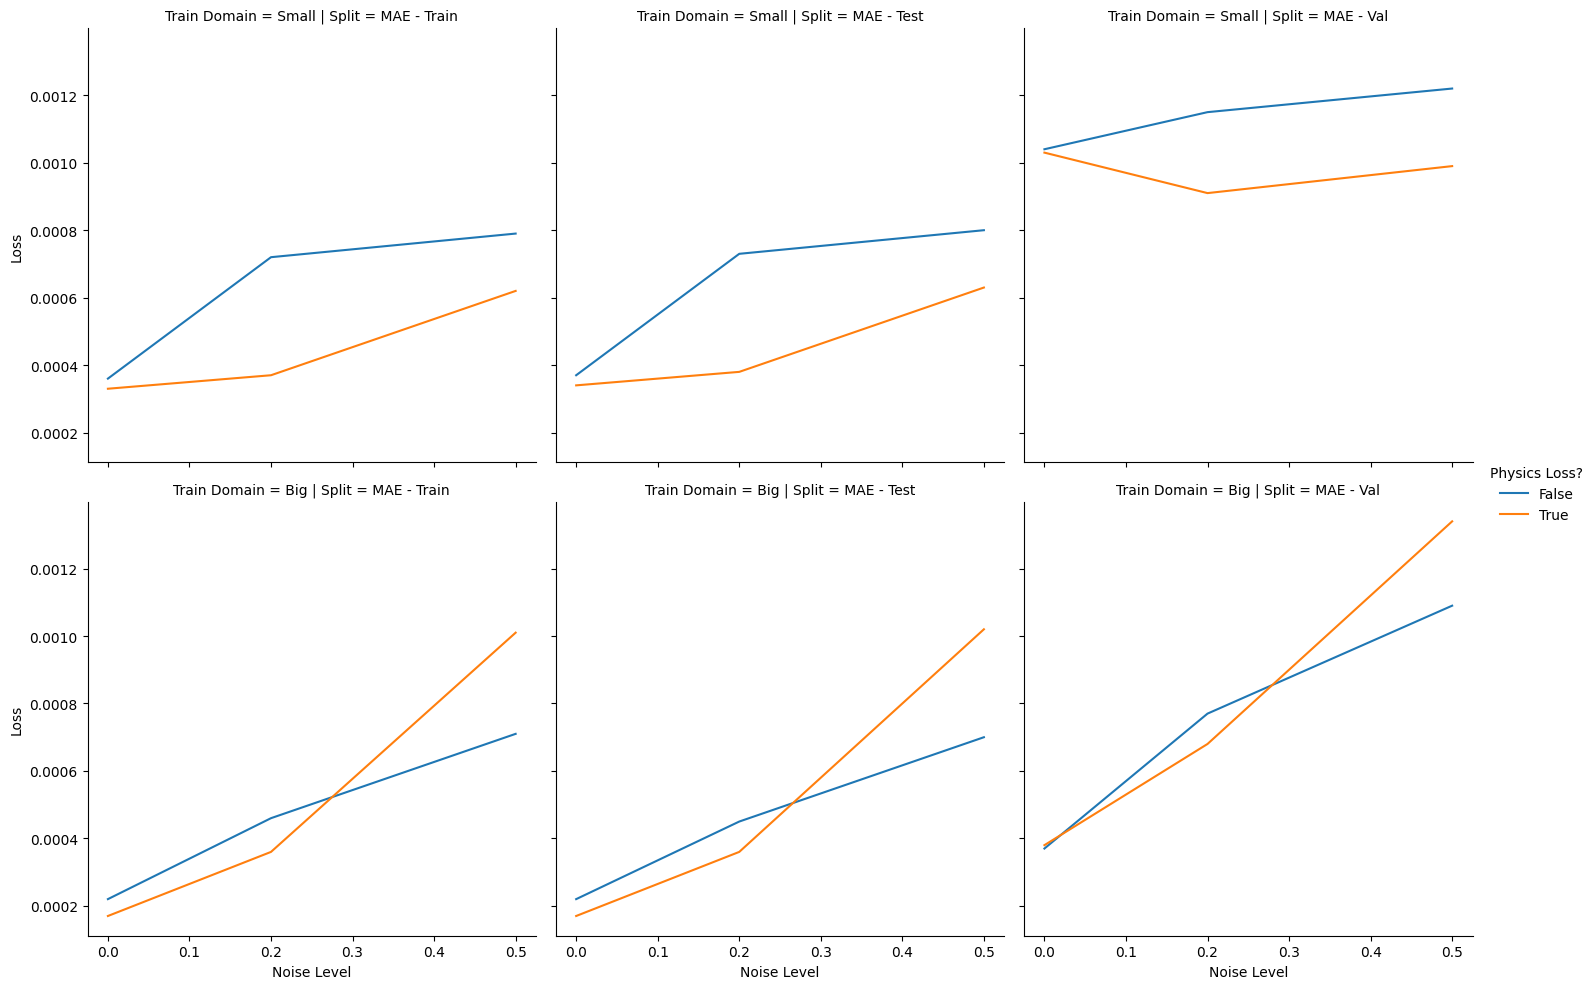

In [167]:
import seaborn as sns
sns.relplot(df, x='Noise Level', y='Loss', hue='Physics Loss?', col='Split', row='Train Domain', kind='line')

<Axes: xlabel='Noise Level', ylabel='MAE - Test'>

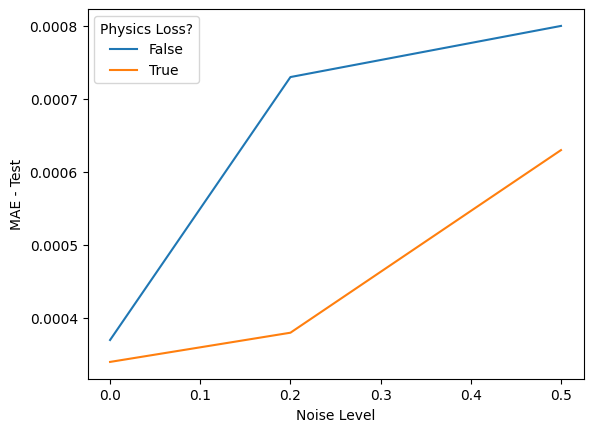

In [152]:
ax = sns.lineplot(df[df['Train Domain']=='Small'], x='Noise Level', y='MAE - Test', hue='Physics Loss?')
ax

TypeError: plot() got an unexpected keyword argument 'x'

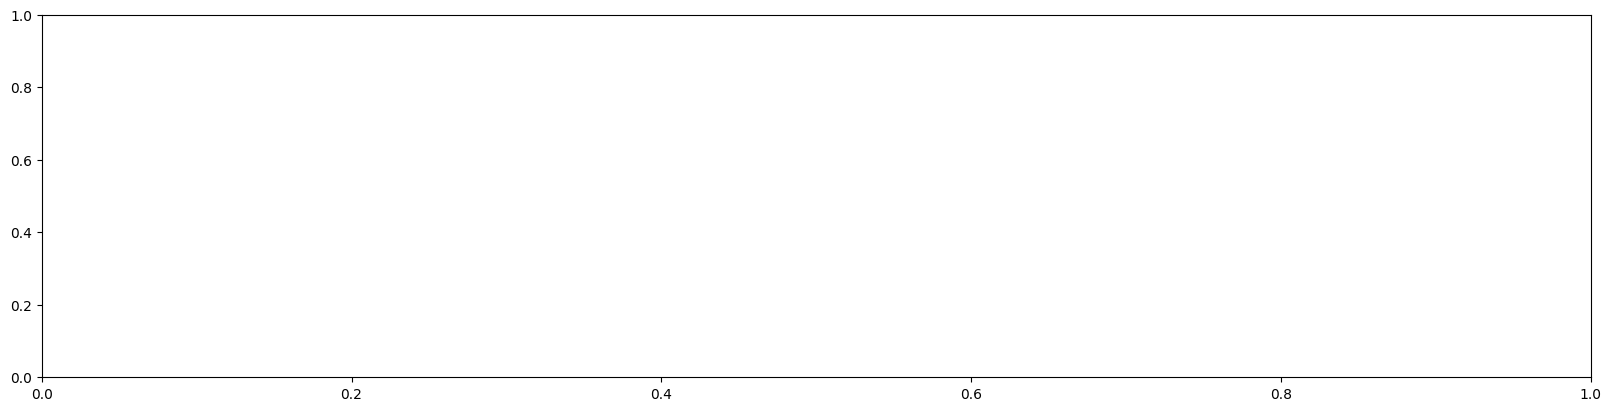

In [148]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(16,4), layout='compressed')

for i, df_grouped in df.groupby(['Train Domain', 'Physics Loss?']):
    x = df_grouped['Noise Level'].values
    y = df_grouped['MAE - Test'].values
    label = f''
    ax.plot(x=x, y=y)
